## Random Forest Classifier

Import Modules

In [555]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.tree import export_graphviz
from graphviz import Source
import matplotlib.pyplot as plt
import graphviz
import pydot
import pandas as pd
import numpy as np
import os

Read data

In [556]:
# # Connect to your google drive:
# drive.mount('/content/drive/')
# #os.chdir("/content/drive/MyDrive/AirfoilData/Airfoils")
# os.chdir("/content/drive/MyDrive/AirfoilData/")



data = pd.read_csv('combined-naca.csv')
#features = pd.read_csv('naca0021.csv')
data.head(5)
print('The shape of our features is:', data.shape)
# Descriptive statistics for each column
data.describe()

The shape of our features is: (3652, 8)


,Alpha,Cl,Cd,Cdp,Cm,Top_Xtr,Bot_Xtr,Naca
count,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000
mean,0.764239,0.253072,0.022089,0.016955,-0.041006,0.525791,0.561634,2310.521632
std,10.562997,0.967161,0.021333,0.021750,0.043580,0.397649,0.435943,1876.249303
min,-19.750000,-1.564400,0.003380,0.000730,-0.157400,0.003300,0.003200,6.000000
25%,-8.000000,-0.633650,0.008778,0.003210,-0.065600,0.074575,0.065575,21.000000
50%,1.000000,0.320150,0.013440,0.007820,-0.036300,0.537050,0.684850,2412.000000
75%,9.750000,1.202625,0.025755,0.020650,-0.004800,0.972025,1.000000,4412.000000
max,19.250000,1.708400,0.151610,0.149750,0.043200,1.000000,1.000000,6412.000000


Show Sample Data

In [557]:
data.sample(n=10)

,Alpha,Cl,Cd,Cdp,Cm,Top_Xtr,Bot_Xtr,Naca
2861,10.00,1.2374,0.01605,0.00977,-0.0322,0.0230,1.0000,2411
1950,18.75,1.4865,0.06890,0.06522,0.0215,0.0295,1.0000,12
3329,15.75,1.5005,0.03963,0.03391,0.0004,0.0510,1.0000,2418
2813,-2.00,0.0902,0.00643,0.00128,-0.0679,0.7967,0.2594,2411
3569,-1.50,-0.0258,0.00921,0.00319,-0.0249,0.5515,0.3704,2424
3552,-5.75,-0.2130,0.00984,0.00402,-0.0863,0.7121,0.2538,2424
1674,-13.75,-1.3544,0.02700,0.02259,-0.0209,1.0000,0.0087,10
2124,-15.75,-1.3846,0.03203,0.02649,-0.0393,1.0000,0.0439,18
1083,2.00,0.6706,0.00871,0.00325,-0.0876,0.4742,0.6222,4421
3146,8.00,1.0966,0.01192,0.00594,-0.0437,0.1166,1.0000,2414


Splitting NACA digits

In [558]:
data['Naca_1st'] = data['Naca'] // 1000
data['Naca_2nd'] = (data['Naca'] % 1000) // 100
data['Naca_3rd'] = data['Naca'] % 100
data.sample(n=10)

,Alpha,Cl,Cd,Cdp,Cm,Top_Xtr,Bot_Xtr,Naca,Naca_1st,Naca_2nd,Naca_3rd
865,-15.25,-1.0965,0.03328,0.03022,-0.0993,1.0000,0.0153,4412,4,4,12
1531,17.25,1.6858,0.08262,0.07733,-0.0779,0.0142,0.9999,6412,6,4,12
1908,8.25,0.9470,0.01160,0.00579,-0.0009,0.0762,1.0000,12,0,0,12
2948,-5.00,-0.3006,0.00836,0.00282,-0.0565,0.9247,0.0775,2412,2,4,12
1789,15.00,1.3640,0.03629,0.03242,0.0276,0.0078,1.0000,10,0,0,10
2602,10.75,1.3133,0.02144,0.01625,-0.0353,0.0060,1.0000,2408,2,4,8
2352,12.00,1.2986,0.02752,0.02332,-0.0066,0.0069,1.0000,1408,1,4,8
1103,7.50,1.1954,0.01191,0.00693,-0.0720,0.3465,1.0000,4421,4,4,21
2204,6.00,0.6426,0.00915,0.00383,0.0078,0.2295,0.9068,18,0,0,18
1237,2.25,0.3615,0.01030,0.00440,-0.0145,0.4692,0.4873,4424,4,4,24


Create RandomForest Classifier with Hyperparameter

Training, test and validation sets split

In [559]:
# get the list of all NACAs in dataset
uniqueNACAs = data.Naca.unique()
print('Unique NACAs: ', uniqueNACAs, '\n\nin total: ', len(uniqueNACAs))

# choose how big should be the training and test set
trainSetShare = 0.6
testSetShare = 0.38

# calculate how many NACA profiles will be in each subset
trainSetSize = int(trainSetShare * len(uniqueNACAs))
testSetSize = int(testSetShare * len(uniqueNACAs))
validSetSize = len(uniqueNACAs) - testSetSize - trainSetSize

print(f'\nSubset sizes:\n - training set: {trainSetSize}\n - test set: {testSetSize}\n - validation set: {validSetSize}\n\n\n')

# shuffle unique NACAs list to randomize the subsets division
np.random.seed(3)
np.random.shuffle(uniqueNACAs)

# divide the subsets
trainNACAs = uniqueNACAs[:trainSetSize]
testNACAs = uniqueNACAs[trainSetSize:trainSetSize+testSetSize]
validNACAs = uniqueNACAs[trainSetSize+testSetSize:]

print(f'- training set - {np.sort(trainNACAs)}')
print(f'- test set - {np.sort(testNACAs)}')
print(f'- validation set - {np.sort(validNACAs)}')

Unique NACAs:  [   9   21 1410 2415 4415 4418 4412 4421 4424 6409 6412    6    8   10
   12   15   18 1408 1412 2408 2410 2411 2412 2414 2418 2421 2424] 

in total:  27

Subset sizes:
 - training set: 16
 - test set: 10
 - validation set: 1



- training set - [   8   10   12   15   18   21 1408 1410 1412 2412 2414 2421 4412 4415
 4418 4421]
- test set - [   6    9 2408 2410 2411 2415 2418 2424 4424 6409]
- validation set - [6412]


In [560]:
# Dividing all data into subsets
trainSet = data.loc[data['Naca'].isin(trainNACAs)]
testSet = data.loc[data['Naca'].isin(testNACAs)]
validSet = data.loc[data['Naca'].isin(validNACAs)]

Spli Data into Featureset and Labelset

In [561]:
featuresNames = ['Alpha', 'Naca_1st', 'Naca_2nd', 'Naca_3rd']
labelNames = ['Cl', 'Cd', 'Cdp', 'Cm', 'Top_Xtr', 'Bot_Xtr']

In [562]:
labelNames = ['Cl', 'Cd']

In [563]:


# Dividing features and targets/labels
feature_train = trainSet[featuresNames]
label_train = trainSet[labelNames]

feature_test = testSet[featuresNames]
label_test = testSet[labelNames]

feature_valid = validSet[featuresNames]
label_valid = validSet[labelNames]

feature_test

,Alpha,Naca_1st,Naca_2nd,Naca_3rd
0,-15.75,0,0,9
1,-15.50,0,0,9
2,-15.25,0,0,9
3,-15.00,0,0,9
4,-14.75,0,0,9
...,...,...,...,...
3647,18.25,2,4,24
3648,18.50,2,4,24
3649,18.75,2,4,24
3650,19.00,2,4,24


Show Trained Features and Labels

In [564]:
print('Training Features Shape:', feature_train.shape)
print('Training Labels Shape:', label_train.shape)
print('Testing Features Shape:', feature_test.shape)
print('Testing Labels Shape:', label_test.shape)
print('Validation Features Shape:', feature_valid.shape)
print('Validation Labels Shape:', label_valid.shape)
print(feature_test,label_test)

Training Features Shape: (2229, 4)
Training Labels Shape: (2229, 2)
Testing Features Shape: (1296, 4)
Testing Labels Shape: (1296, 2)
Validation Features Shape: (127, 4)
Validation Labels Shape: (127, 2)
      Alpha  Naca_1st  Naca_2nd  Naca_3rd
0    -15.75         0         0         9
1    -15.50         0         0         9
2    -15.25         0         0         9
3    -15.00         0         0         9
4    -14.75         0         0         9
...     ...       ...       ...       ...
3647  18.25         2         4        24
3648  18.50         2         4        24
3649  18.75         2         4        24
3650  19.00         2         4        24
3651  19.25         2         4        24

[1296 rows x 4 columns]           Cl       Cd
0    -0.9871  0.10108
1    -1.0438  0.08589
2    -1.0914  0.07218
3    -1.1223  0.06145
4    -1.1600  0.05005
...      ...      ...
3647  1.3106  0.06522
3648  1.3098  0.06777
3649  1.3111  0.07012
3650  1.3073  0.07304
3651  1.3028  0.07604

[1

Instantiate RF model

In [565]:
# Instantiate model with 1000 decision trees

# 1000 trees model
# rf = RandomForestRegressor(n_estimators = 1000, random_state = 60)

# 10 trees model
#n_estimators=1,5,10,100
#random_state=0,5,25,50
#min_samples_leaf,500
rf = RandomForestRegressor(n_estimators = 7, random_state=25)

# Train the model on training data
rf.fit(feature_train, label_train);

Use RandomForrest on Test data

In [566]:
predictions = rf.predict(feature_test)
print(predictions.shape)
print(label_test.shape)
# Calculate the absolute errors
errors = abs(predictions - label_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
predictions

(1296, 2)
(1296, 2)
Mean Absolute Error: 0.04 degrees.


array([[-1.31581429,  0.0538    ],
       [-1.33452857,  0.04709429],
       [-1.34852857,  0.04188   ],
       ...,
       [ 1.47081429,  0.07449286],
       [ 1.4676    ,  0.077     ],
       [ 1.46338571,  0.07965714]], shape=(1296, 2))

Calculate Accuracy

In [567]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / abs(label_test))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
# print(f'Accuracy: {accuracy:.2f} %.')

Accuracy: -inf %.


Calculate R2

In [568]:
from sklearn.metrics import r2_score

r2_Cl = r2_score(label_test['Cl'], predictions[:,0])
r2_Cd = r2_score(label_test['Cd'], predictions[:,1])

print(f'R-squared for predictions:\n - Cl: r2 = {r2_Cl:.3f}\n - Cd: r2 = {r2_Cd:.3f}')

R-squared for predictions:
 - Cl: r2 = 0.982
 - Cd: r2 = 0.810


Display RandomForrestGraph

In [569]:
# # Pull out one tree from the forest
# #tree = rf.estimators_[5]
# # Pull out one tree from the forest
# tree = rf.estimators_[0]
# ## Export the image to a dot file
# export_graphviz(tree, out_file = 'depth2.dot', feature_names = featuresNames, rounded = True, precision = 1)
# ## Use dot file to create a graph
# (graph, ) = pydot.graph_from_dot_file('depth2.dot')

# s = Source(graph, filename="depth2.dot", format="png")
# s.render("depth2") 
# s.view()
# ## Write graph to a png file
# graph.write_png('depth2.png')

Plot Predicted Polar

1413    6
1414    6
1415    6
1416    6
1417    6
       ..
1535    6
1536    6
1537    6
1538    6
1539    6
Name: Naca_1st, Length: 127, dtype: int64
1413    4
1414    4
1415    4
1416    4
1417    4
       ..
1535    4
1536    4
1537    4
1538    4
1539    4
Name: Naca_2nd, Length: 127, dtype: int64
1413    12
1414    12
1415    12
1416    12
1417    12
        ..
1535    12
1536    12
1537    12
1538    12
1539    12
Name: Naca_3rd, Length: 127, dtype: int64


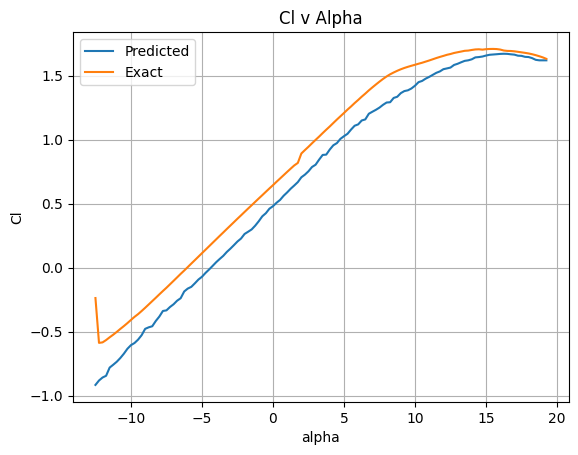

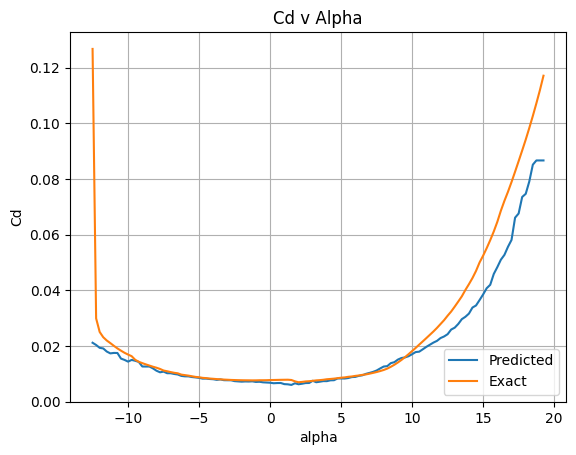

In [570]:
# Making a prediction 
prediction_polarCurve = rf.predict(feature_valid)
alphaRange=feature_valid['Alpha']
np.squeeze(prediction_polarCurve) # removing of a dimension equal to 1 (from (77,1) to (77,)  )


#print(feature_valid['Naca_1st'].squeeze,feature_valid['Naca_2nd'].squeeze,feature_valid['Naca_3rd'].squeeze)
print(feature_valid['Naca_1st'])
print(feature_valid['Naca_2nd'])
print(feature_valid['Naca_3rd'])
exactPolarCurve = label_valid['Cl']
plt.figure()
plt.plot(alphaRange,prediction_polarCurve[:,0])
plt.plot(alphaRange,exactPolarCurve)
plt.grid();
plt.xlabel('alpha');
plt.ylabel('Cl');
plt.title('Cl v Alpha')
plt.legend(['Predicted', 'Exact'])

exactPolarCurve = label_valid['Cd']
plt.figure()
plt.plot(alphaRange,prediction_polarCurve[:,1])
plt.plot(alphaRange,exactPolarCurve)
plt.grid();
plt.xlabel('alpha');
plt.ylabel('Cd');
plt.title('Cd v Alpha')
plt.legend(['Predicted', 'Exact'])